In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
import itertools
import numpy as np
import seaborn as sb
import pickle                        # Ye basically best one select krne ke liye hai.

In [2]:
df=pd.read_csv("Files/data.csv")

In [3]:
df.shape

(6335, 4)

In [4]:
df.head(10)

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


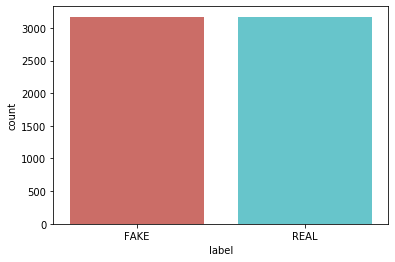

In [5]:
# distribution of classes for prediction
def create_distribution(dataFile):
    return sb.countplot(x='label',data=dataFile,palette='hls')

# by calling below we can see that training, testing and validating data seems to be evenly distributed between the classes.
create_distribution(df)

In [6]:
# data integrity check for missing values
# Since the dataset contains non missing values, so no cleaning required.

def data_qualityCheck():
    print("Checking data quality...")
    df.isnull().sum()
    print(" .. .... ...... ")
    df.info()
    print("Check Finished.")
    
data_qualityCheck()                                  # Agar koi null field hogi to use report krne ke liye

Checking data quality...
 .. .... ...... 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 123.8+ KB
Check Finished.


In [7]:
# Seperate the labels and set up training and testing data...

# get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
# Drop the label column
df.drop("label",axis=1)

,id,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


In [9]:
# Make training and testing data

x_train,x_test,y_train,y_test=train_test_split(df['text'],labels,test_size=0.33,random_state=7)

In [10]:
x_train.head(10)     # To see which of the fields are in training set

951     Seven years ago, in the Czech capital of Pragu...
4662    While facing budget cuts, the IRS nevertheless...
1012    Katie Walsh, the Republican National Committee...
5718    Let us be clear: Republicans in the Senate are...
3173    Massachusetts +11% New York +10% \nWhen home p...
360     Print version Font Size The hypersonic aircraf...
1557    In early August, Donald Trump suffered a drop ...
584     2016 presidential campaign by BAR executive ed...
1905    U.S. Secretary of State Hillary Clinton speaks...
5526    Get short URL 0 3 0 0 Buddy Blackwell asked hi...
Name: text, dtype: object

In [11]:
x_test.head(10)     # To see which of the fields are in testing set

3534    A day after the candidates squared off in a fi...
6265    VIDEO : FBI SOURCES SAY INDICTMENT LIKELY FOR ...
3123    It's debate season, where social media has bro...
3940    Mitch McConnell has decided to wager the Repub...
2856    Donald Trump, the actual Republican candidate ...
3031    Not all the claims in the vice presidential de...
4854    WASHINGTON—Top administration officials forcef...
5861    Top Dems want White House to call off Part B d...
307     Corrections and clarifications: An earlier ver...
2956    posted by Eddie Censorship by Facebook has bec...
Name: text, dtype: object

In [12]:
# before we can train an algorithm to classify fake newss labels, we need to extractv features from it. It means reducing the 
# mass if unstructured data into some uniform set of attributes that an algorithm can understand.

# Initilazing the 'count_vectorizer'
count_vectorizer=CountVectorizer(stop_words='english')

In [13]:
count_train=count_vectorizer.fit_transform(x_train)

print(count_vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [14]:
print(count_train)

  (0, 44779)	1
  (0, 55380)	4
  (0, 2677)	1
  (0, 12966)	1
  (0, 8670)	1
  (0, 38624)	2
  (0, 5508)	1
  (0, 34934)	5
  (0, 13823)	1
  (0, 30573)	1
  (0, 19987)	1
  (0, 38200)	2
  (0, 46799)	1
  (0, 38891)	5
  (0, 40525)	1
  (0, 3898)	1
  (0, 28629)	1
  (0, 53509)	1
  (0, 36910)	2
  (0, 44420)	3
  (0, 55024)	6
  (0, 34787)	18
  (0, 54155)	15
  (0, 16319)	1
  (0, 55372)	1
  :	:
  (4243, 40257)	1
  (4243, 30153)	1
  (4243, 26167)	1
  (4243, 53377)	1
  (4243, 16851)	1
  (4243, 37122)	1
  (4243, 38620)	1
  (4243, 11816)	2
  (4243, 13733)	1
  (4243, 23044)	1
  (4243, 12948)	1
  (4243, 23354)	1
  (4243, 27101)	1
  (4243, 36778)	1
  (4243, 24519)	1
  (4243, 39129)	1
  (4243, 46401)	1
  (4243, 49561)	1
  (4243, 32643)	1
  (4243, 18159)	1
  (4243, 15999)	1
  (4243, 52808)	1
  (4243, 7142)	1
  (4243, 21148)	1
  (4243, 33400)	1


In [15]:
# print training doc term matrix
# we have matrix of size of (4244,56245) by calling :

def get_countVectorizer_stats():
    
    #vocab size
    print(count_train.shape)
    
    # checking vocabulary
    print(count_vectorizer.vocabulary_)
    
get_countVectorizer_stats()

(4244, 56245)
{'seven': 44779, 'years': 55380, 'ago': 2677, 'czech': 12966, 'capital': 8670, 'prague': 38624, 'barack': 5508, 'obama': 34934, 'delivered': 13823, 'major': 30573, 'foreign': 19987, 'policy': 38200, 'speech': 46799, 'president': 38891, 'rapturous': 40525, 'applause': 3898, 'laid': 28629, 'vision': 53509, 'peace': 36910, 'security': 44420, 'world': 55024, 'nuclear': 34787, 'weapons': 54155, 'earned': 16319, 'year': 55372, 'nobel': 34427, 'prize': 39105, 'friday': 20401, 'bookend': 7206, 'terms': 49589, 'office': 35193, 'appeal': 3863, 'disarmament': 14853, 'time': 50162, 'historic': 23778, 'trip': 51032, 'hiroshima': 23762, 'sitting': 45749, 'visited': 53516, 'japanese': 26866, 'city': 10076, 'razed': 40642, 'ground': 22187, 'single': 45674, 'atomic': 4687, 'bomb': 7134, 'final': 19330, 'days': 13266, 'second': 44378, 'war': 53938, 'estimated': 17759, '140': 240, '000': 1, 'people': 37095, 'civilians': 10087, 'perished': 37186, 'instantly': 25911, 'vast': 53054, 'inferno':

In [16]:
# Transform the test data
count_test=count_vectorizer.transform(x_test)

In [17]:
# creating and initialising the TfidfVectorizer so that we can form a matrix of the data

tfidf_vectorizer=TfidfVectorizer(stop_words="english",max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train)

In [18]:
def get_tfidf_stats():
    
    print(tfidf_train.shape)
    
    
get_tfidf_stats()

(4244, 56245)


In [19]:
# Transform the test data
tfidf_test=tfidf_vectorizer.transform(x_test)

# get feature names of 'tfidf_vectorizer':
print(tfidf_vectorizer.get_feature_names()[-10:])

# get feature names of 'count_vectorizer':
print(count_vectorizer.get_feature_names()[:10])

['تنجح', 'حلب', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '0002', '000billion']


In [20]:
# Function to plot the confusion matrix
# Normalization can be applied by setting "normalize=True"

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without Normalization")
    
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]> thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [21]:
# building classifier using naive bayes
# Naive Bayes for Multinomiall Model
# Using tfidf

nb_pipeline=Pipeline([('NBTV',tfidf_vectorizer),('nb_clf',MultinomialNB())]) # NB -> Naive Bayes

In [22]:
# Fit Naive Bayes Classifier a/c to x,y

nb_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('NBTV',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [23]:
# Perform Classification on an array of test vectors X
predicted_nbt=nb_pipeline.predict(x_test)

In [24]:
score=metrics.accuracy_score(y_test,predicted_nbt)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:82.31%


Confusion Matrix without Normalization


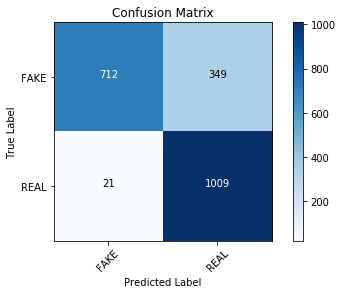

In [25]:
cm=metrics.confusion_matrix(y_test,predicted_nbt,labels=['FAKE','REAL'])
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [26]:
print(cm)

[[ 712  349]
 [  21 1009]]


In [27]:
# Using count_vectorizer

nbc_pipeline=Pipeline([('NBCV',count_vectorizer),('nb_clf',MultinomialNB())])

nbc_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('NBCV',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [28]:
# Accuracy by count_vectorizer

predicted_nbc=nbc_pipeline.predict(x_test)

score=metrics.accuracy_score(y_test,predicted_nbc)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:88.43%


Confusion Matrix without Normalization


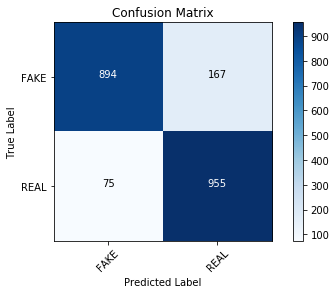

In [29]:
cm=metrics.confusion_matrix(y_test,predicted_nbc,labels=['FAKE','REAL'])
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [30]:
print(cm)

[[894 167]
 [ 75 955]]


In [31]:
# Also applying Passive-Aggressive Classifier
# So that we can select best between them...

linear_clf=Pipeline([('linear',tfidf_vectorizer),('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
linear_clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('linear',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('pa_clf',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
       

In [32]:
# Predicting the test set and accuracy for PassiveAggressive Classifier

pred=linear_clf.predict(x_test)
score=metrics.accuracy_score(y_test,pred)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:93.35%


Confusion Matrix without Normalization


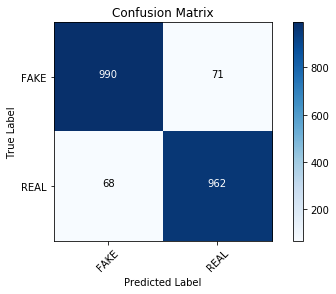

In [33]:
# Building Confusion Matrix for PA Classifier

cm=metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [34]:
print(cm)

[[990  71]
 [ 68 962]]


Since, we have made use of 2 Classifiers, so we will be selcting the best of two.
This decision will be made for the classifier which gives best accuracy.

In [35]:
# saving the best model for the disk.

model_file='final_model.sav'
pickle.dump(linear_clf,open(model_file,'wb'))

In [36]:


var=input("Please enter the news text you wish to verify:\n")

# function to run for prediction
def detecting_fake_news(var):
    
    
if __name__=='__main__':
    detecting_fake_news(var)

IndentationError: expected an indented block (<ipython-input-36-5c4a65361961>, line 7)

In [ ]:
import pickle
from tkinter import *
def reset():
    news.set("")
    result.set("")
    
def predict():
    
    # fetching the news statement...
    news_var=news.get()
    
    # retrieving the best model for prediction call
    load_model=pickle.load(open('final_model.sav','rb'))
    prediction=load_model.predict([news_var])
    
    # setting the result in result textfield...
    result.set(str(prediction[0]))
    
    
root=Tk()
root.geometry("1024x600+150+50")
root.title("Fake News Detection App")
root.resizable(False,False)

title=Label(root,text="Fake News Detection App",bd=5,relief=GROOVE,bg="skyblue",fg="purple",font=("times new roman",26,"bold"),pady=2).pack(fill=X)

F1=LabelFrame(root,text="News Form",font=("times new roman",15,"bold"),fg="purple",bg="lightblue",bd=3,relief=GROOVE)
F1.place(x=0,y=60,relwidth=1,height=400)

news=StringVar()
news_lbl=Label(F1,text="Enter News:",bg="lightblue",fg="Blue",font=("times new roman",16,"bold")).grid(row=0,column=0,padx=15,pady=6)
news_txt=Entry(F1,textvariable=news,width=65,bd=3,relief=SUNKEN,font=("arial",16)).grid(row=0,column=1,padx=15,pady=6)


predict_btn=Button(F1,command=predict,text="Predict",bg="lightblue",fg="Blue",pady=20,font="arila 15 bold",width=6,bd=5,relief=GROOVE)
predict_btn.place(x=350,y=150,width=100,height=60)\

reset_btn=Button(F1,command=reset,text="Reset",bg="lightblue",fg="Blue",pady=20,font="arila 15 bold",width=6,bd=5,relief=GROOVE)
reset_btn.place(x=550,y=150,width=100,height=60)


F2=LabelFrame(root,text="Results",font=("times new roman",15,"bold"),fg="purple",bg="lightblue",bd=3,relief=GROOVE)
F2.place(x=0,y=465,relwidth=1,height=135)

result=StringVar()

res_lbl=Label(F2,text="The News seems to be :",bg="lightblue",fg="Blue",font=("times new roman",16,"bold"))
res_lbl.place(x=20,y=35)
res_txt=Entry(F2,textvariable=result,width=65,bd=1,relief=SUNKEN,font=("arial",16))
res_txt.place(x=235,y=25,width=100,height=50)
res_txt.config(bg="lightblue",fg="Blue",state=DISABLED)


root.mainloop()